# Decison Tree Classifier


# Titanic Survival Prediction Model
#Dataset: titanic_train.csv

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# importing dataset
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape #rows and col

(891, 12)

#By seeing dataset, we notice that some features are not useful for us to make machine learning model. lets drop that feature and reduce dimentions on dataset

PassengerId

Name

SibSp

Parch

Ticket

Cabin

Embarked

In [8]:

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns', inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


# Handling Null Values

In [10]:

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

our dataset contain Null values in Age field. While handling this we will fill null value as mean of age

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [12]:

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


As ML model work on numerical data, we need to encode Sex field as it is text.
We will use LabelEncoder method

In [13]:
from sklearn.preprocessing import LabelEncoder
l_sex = LabelEncoder()

In [14]:
df['l_sex'] = l_sex.fit_transform(df['Sex'])

In [15]:
df.head()

,Survived,Pclass,Sex,Age,Fare,l_sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [17]:

# dropping Sex column as we have new encoded
df.drop(['Sex'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Age,Fare,l_sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


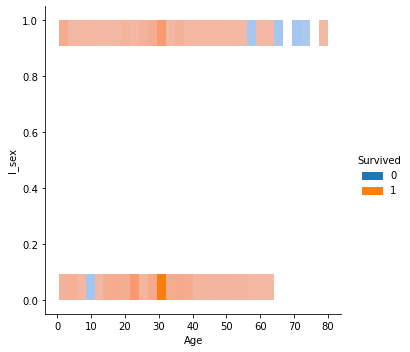

In [18]:
sns.displot(data=df, x='Age', y='l_sex', hue='Survived')

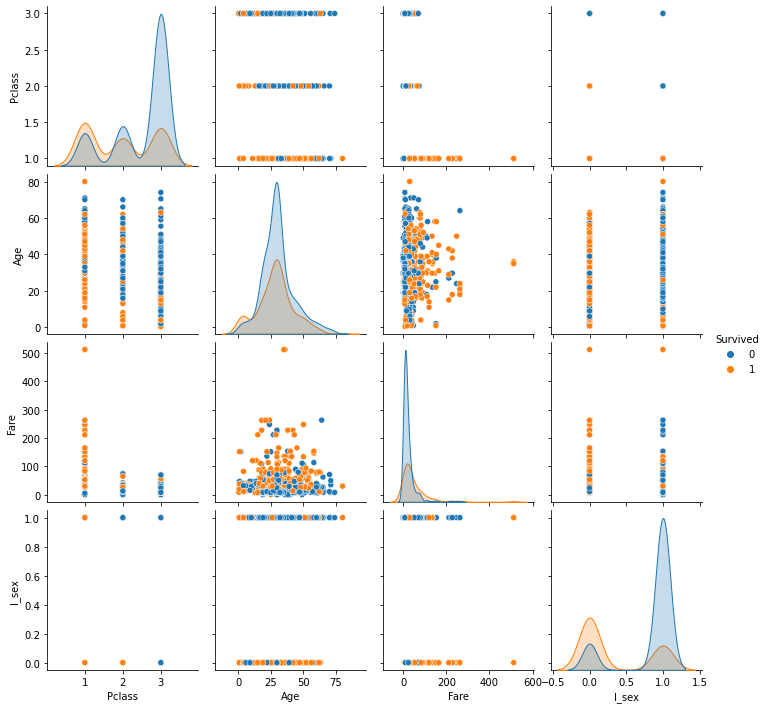

In [19]:
sns.pairplot(data=df, hue='Survived')

# Building ML Model

We will do following steps:

Splitting our data into train and test

building Decision tree

checking metrics such as score and confusion matrix

checking test predictions

In [20]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = model.predict(X_test)

# Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

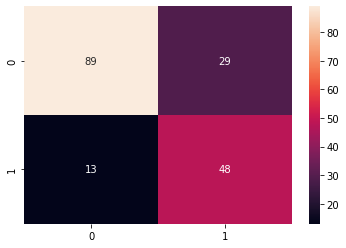

In [26]:
sns.heatmap(matrix, annot=True)

In [29]:
# model accuracy 
accuracy_score(y_test, y_pred)

0.7653631284916201

In [30]:

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       118
           1       0.62      0.79      0.70        61

    accuracy                           0.77       179
   macro avg       0.75      0.77      0.75       179
weighted avg       0.79      0.77      0.77       179



# Conclusion
Our model scores 76.53% with test split of dataset.